In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/big-mart-sales-prediction-dataset/Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [7]:
df.shape

(8523, 12)

In [8]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_weight_mean'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Item_weight_median'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

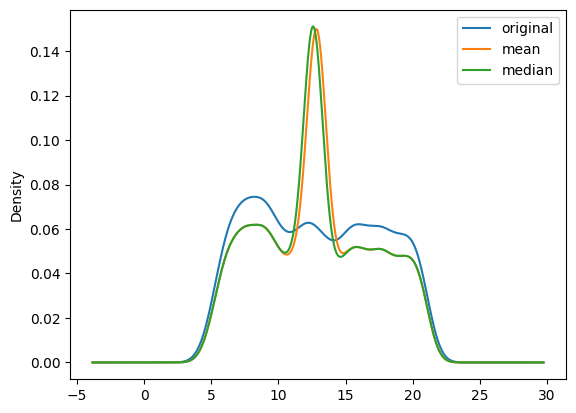

In [10]:
df['Item_Weight'].plot(kind='kde', label='original')
df['Item_weight_mean'].plot(kind='kde', label='mean')
df['Item_weight_median'].plot(kind='kde', label='median')
plt.legend()
plt.show()

In [11]:
df['Item_weight_interpolated'] = df['Item_Weight'].interpolate( method='linear')

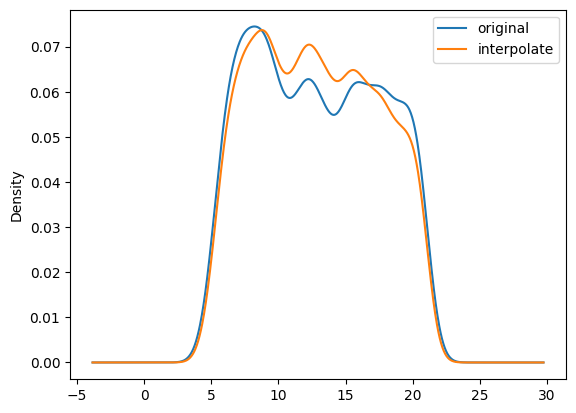

In [12]:
df['Item_Weight'].plot(kind='kde', label='original')
df['Item_weight_interpolated'].plot(kind='kde', label='interpolate')
plt.legend()
plt.show()

In [13]:
print('original_weight_variance: ',df['Item_Weight'].var())
print('mean_weight_variance: ',df['Item_weight_mean'].var())
print('median_weight_variance: ',df['Item_weight_median'].var())
print('interpolated_weight_variance: ',df['Item_weight_interpolated'].var())

original_weight_variance:  21.561688259836558
mean_weight_variance:  17.86012173506058
median_weight_variance:  17.869561454073647
interpolated_weight_variance:  19.758685821975472


In [14]:
df.drop(['Item_Weight', 'Item_weight_mean', 'Item_weight_median'], axis=1, inplace= True)

In [15]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_interpolated
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [16]:
df.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_weight_interpolated        0
dtype: int64

In [17]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [19]:
df['Outlet_Size'] = df.Outlet_Size.fillna(df.Outlet_Size.dropna().mode()[0])

In [20]:
df.isnull().sum().sort_values(ascending=False)

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_weight_interpolated     0
dtype: int64

In [21]:
df.drop(['Item_Identifier'], axis=1, inplace=True)

In [22]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_interpolated
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,19.20
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [23]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)

/tmp/ipykernel_18/106664618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}, inplace=True)


In [25]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

In [26]:
cat_list = df_cat.columns

In [27]:
cat_list

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [28]:
le = LabelEncoder()

In [29]:
df_cat[cat_list] = df_cat[cat_list].apply(le.fit_transform)

In [30]:
df_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,4,9,1,0,1
1,1,14,3,1,2,2
2,0,10,9,1,0,1
3,1,6,0,1,2,0
4,0,9,1,0,2,1


In [31]:
df = pd.concat([df_cat, df_num], axis=1)

In [32]:
df.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_weight_interpolated
0,0,4,9,1,0,1,0.016047,249.8092,1999,3735.1380,9.30
1,1,14,3,1,2,2,0.019278,48.2692,2009,443.4228,5.92
2,0,10,9,1,0,1,0.016760,141.6180,1999,2097.2700,17.50
3,1,6,0,1,2,0,0.000000,182.0950,1998,732.3800,19.20
4,0,9,1,0,2,1,0.000000,53.8614,1987,994.7052,8.93


In [33]:
df['Outlet_Establishment_Year'] = 2024 - df['Outlet_Establishment_Year']

In [34]:
def normalize (x):
  return( (x-np.min(x)) / (max(x)-min(x) ))

df = df.apply(normalize)

In [35]:
df.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_weight_interpolated
0,0.0,0.266667,1.000000,0.5,0.0,0.333333,0.048866,0.927507,0.416667,0.283587,0.282525
1,1.0,0.933333,0.333333,0.5,1.0,0.666667,0.058705,0.072068,0.000000,0.031419,0.081274
2,0.0,0.666667,1.000000,0.5,0.0,0.333333,0.051037,0.468288,0.416667,0.158115,0.770765
3,1.0,0.400000,0.000000,0.5,1.0,0.000000,0.000000,0.640093,0.458333,0.053555,0.871986
4,0.0,0.600000,0.111111,0.0,1.0,0.333333,0.000000,0.095805,0.916667,0.073651,0.260494


<Axes: >

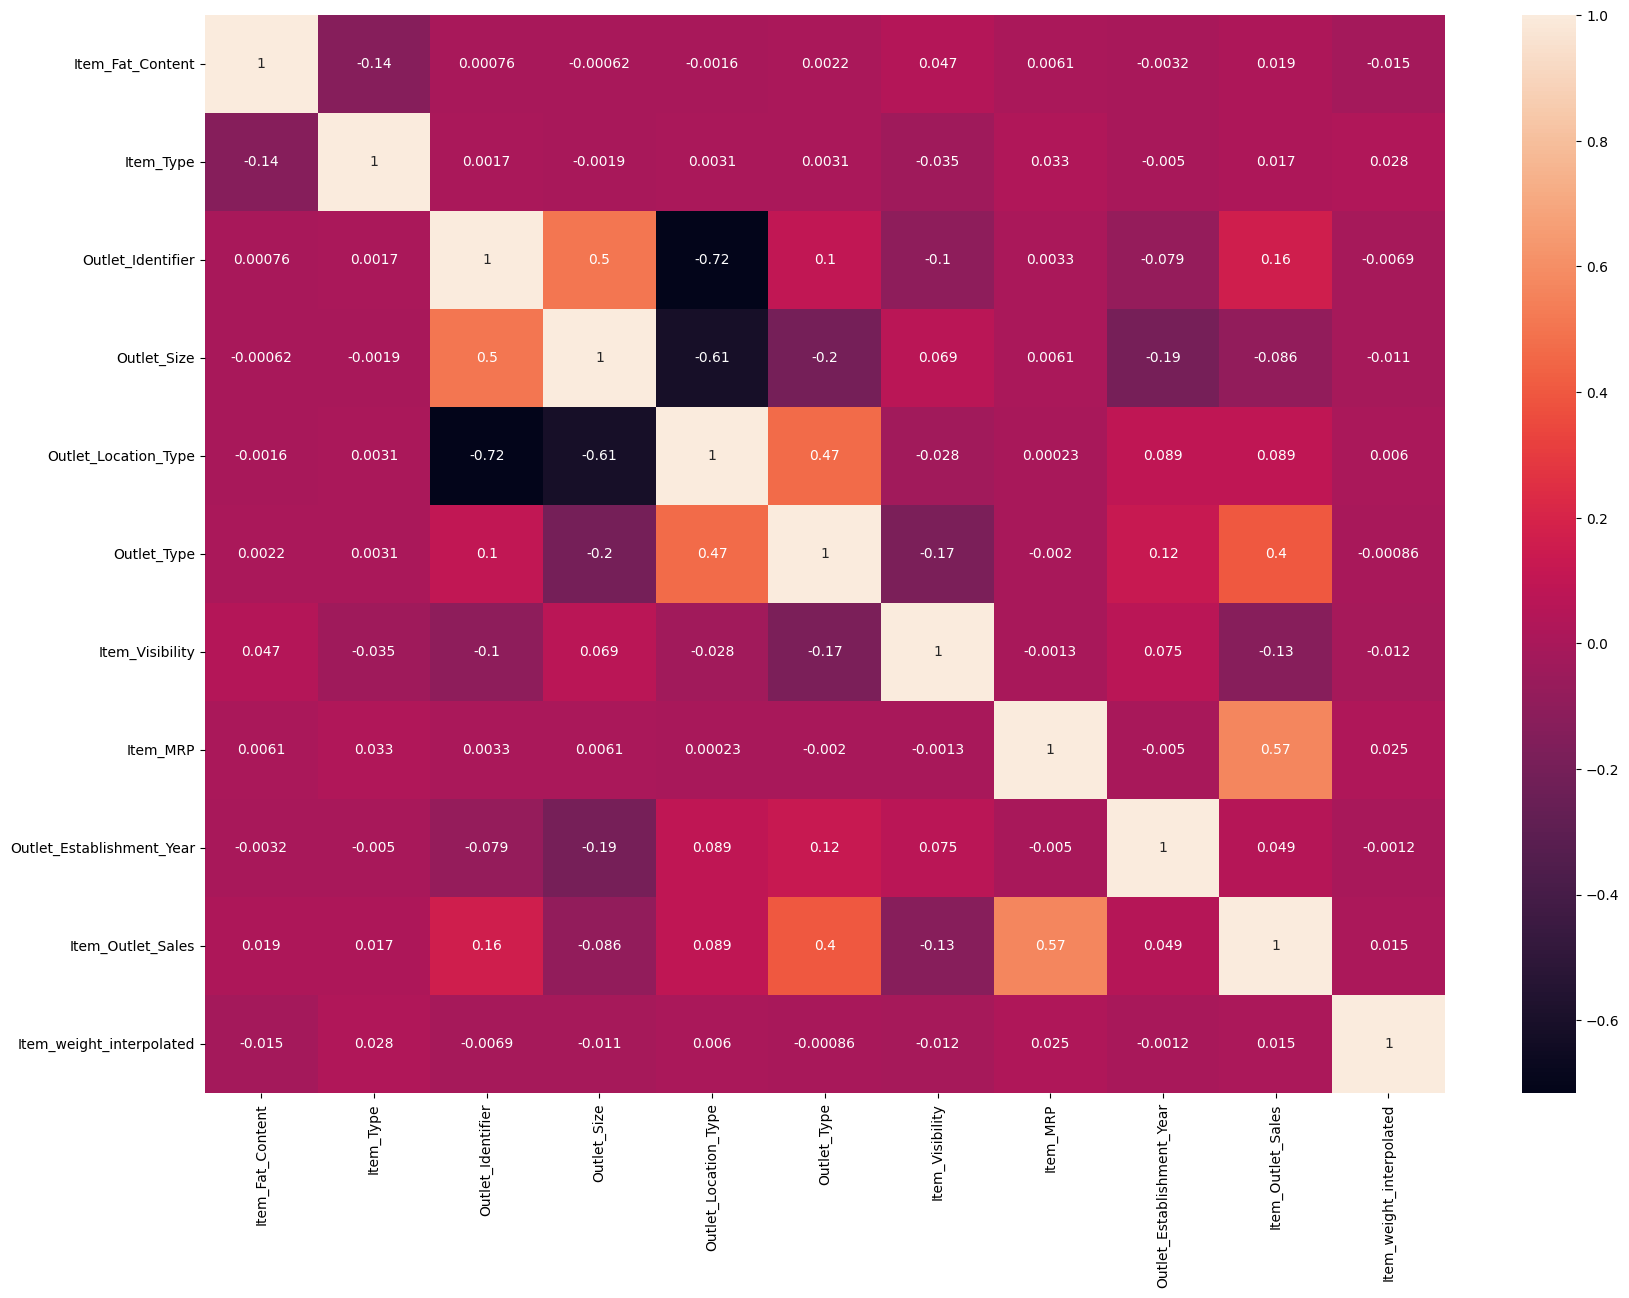

In [36]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot= True)

/tmp/ipykernel_18/3841465891.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=False, ax=ax[index])


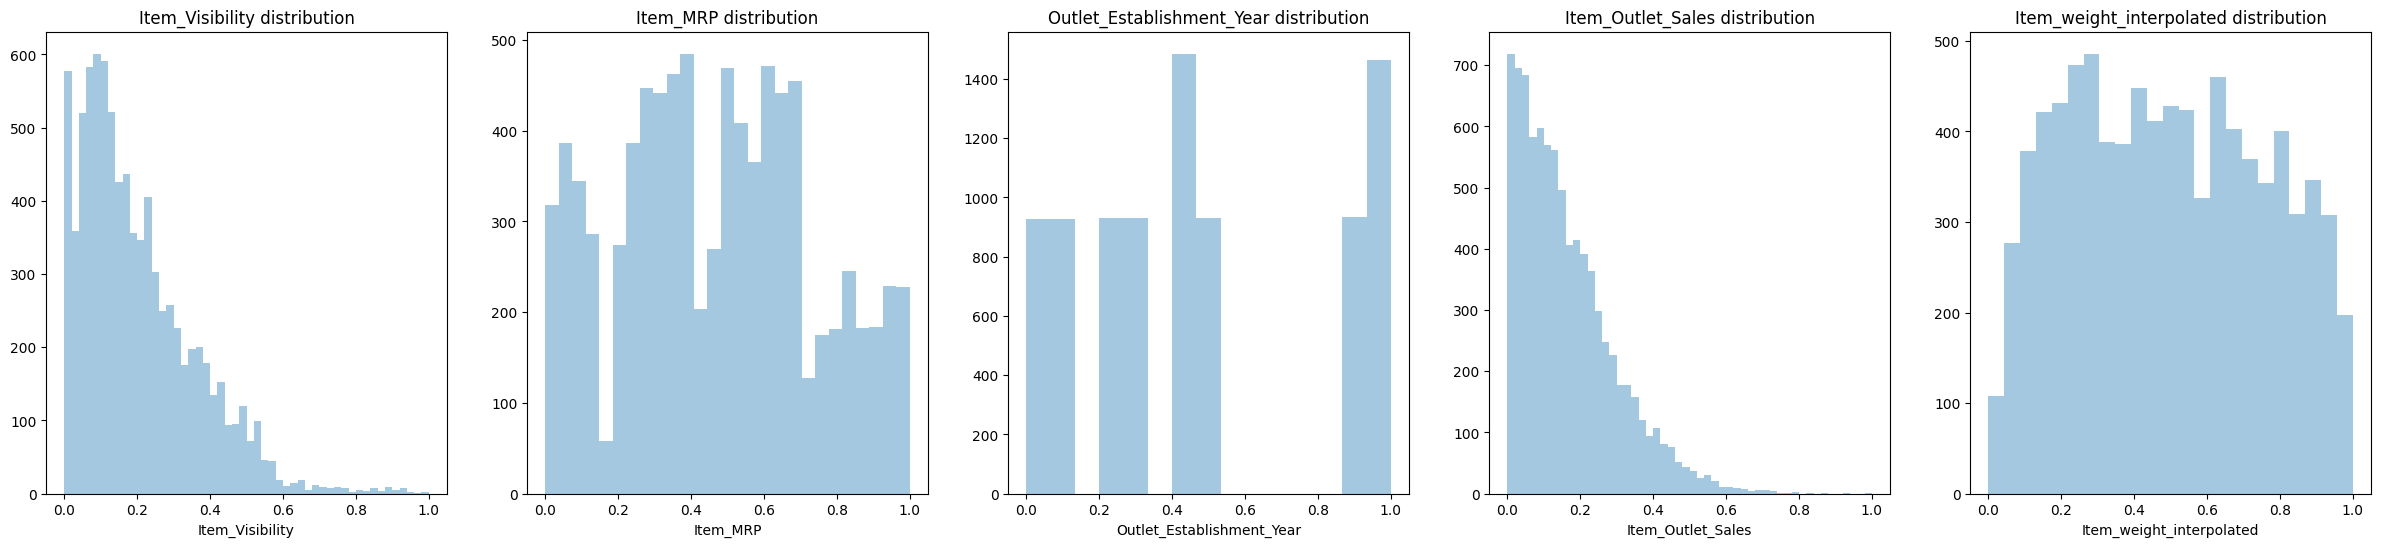

In [37]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(30, 6))

for index, col in enumerate(df_num):
    sns.distplot(df[col], kde=False, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

In [38]:
X = df.drop(['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train_lm = sm.add_constant(X_train)

lm_1 =sm.OLS(y_train,X_train_lm).fit()

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     698.6
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:04:58   Log-Likelihood:                 6552.0
No. Observations:                6818   AIC:                        -1.308e+04
Df Residuals:                    6807   BIC:                        -1.301e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [41]:
X_train_lm = X_train_lm.drop(['Outlet_Establishment_Year', 'Item_Type'], axis=1)

In [42]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     873.5
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:04:58   Log-Likelihood:                 6551.9
No. Observations:                6818   AIC:                        -1.309e+04
Df Residuals:                    6809   BIC:                        -1.302e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [43]:
X_train_lm = X_train_lm.drop(['Item_weight_interpolated'], axis=1)

In [44]:
lm_3 = sm.OLS(y_train,X_train_lm).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     998.4
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:04:59   Log-Likelihood:                 6551.8
No. Observations:                6818   AIC:                        -1.309e+04
Df Residuals:                    6810   BIC:                        -1.303e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0127 

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [49]:
print('MSE: ', mse)
print('R_squared: ', r_squared)
print('MAE: ', mae)

MSE:  0.00757890584242649
R_squared:  0.5248536249248097
MAE:  0.06548800413751688


In [50]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [51]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r_squared_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

In [52]:
print('ridge_MSE: ', mse_ridge)
print('ridge_R_squared: ', r_squared_ridge)
print('ridge_MAE: ', mae_ridge)

ridge_MSE:  0.007578937717179704
ridge_R_squared:  0.5248516265923642
ridge_MAE:  0.06548730464304173


In [53]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [54]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r_squared_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

In [55]:
print('xgb_MSE: ', mse_xgb)
print('xgb_R_squared: ', r_squared_xgb)
print('xgb_MAE: ', mae_xgb)

xgb_MSE:  0.007667276792480335
xgb_R_squared:  0.519313361270262
xgb_MAE:  0.06090328303650639


**Best** **Model**

In [56]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [57]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

In [58]:
print('rf_MSE: ', mse_rf)
print('rf_R_squared: ', r_squared_rf)
print('rf_MAE: ', mae_rf)

rf_MSE:  0.006947980323084356
rf_R_squared:  0.5644084075927347
rf_MAE:  0.05802284835302378
